In [1]:
#load the data
import pandas as pd
import numpy as np
data_train = pd.read_csv('T-R-train.csv')
data_train


,T,rate
0,46.53,2.49
1,48.14,2.56
2,50.15,2.63
3,51.36,2.69
4,52.57,2.74
5,54.18,2.80
6,56.19,2.88
7,58.58,2.92
8,61.37,2.96
9,63.34,2.95


In [2]:
#define X_train and y_train
X_train = data_train.loc[:,'T']
y_train = data_train.loc[:,'rate']

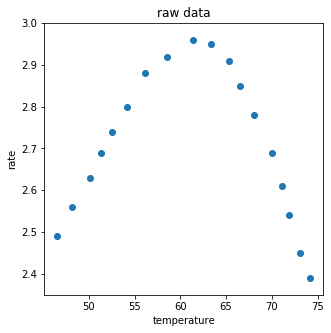

In [3]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(5,5))
plt.scatter(X_train,y_train)
plt.title('raw data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [4]:
X_train = np.array(X_train).reshape(-1,1)

In [5]:
#linear regression model prediction
from sklearn.linear_model import  LinearRegression
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
#load the test data
data_test = pd.read_csv('T-R-test.csv')
X_test = data_test.loc[:,'T']
y_test = data_test.loc[:,'rate']

In [7]:
X_test = np.array(X_test).reshape(-1,1)

In [8]:
#make prediction on the training and testing data
y_train_predict = lr1.predict(X_train)
y_test_predict = lr1.predict(X_test)
from sklearn.metrics import r2_score
r2_train = r2_score(y_train,y_train_predict)
r2_test = r2_score(y_test,y_test_predict)
print('training r2:',r2_train)
print('test r2:',r2_test)

training r2: 0.016665703886981964
test r2: -0.7583363437351314


In [9]:
#generate new data
X_range = np.linspace(40,90,300).reshape(-1,1)
y_range_predict = lr1.predict(X_range)

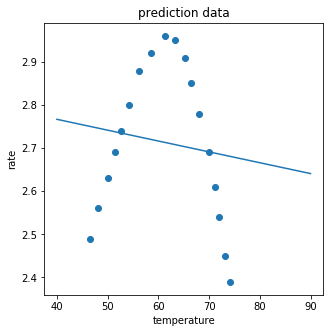

In [10]:
fig2 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_range_predict)
plt.scatter(X_train,y_train)

plt.title('prediction data')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

In [11]:
#多项式模型
#generate new features
from sklearn.preprocessing import PolynomialFeatures
poly2 = PolynomialFeatures(degree=2)
X_2_train = poly2.fit_transform(X_train)
X_2_test = poly2.transform(X_test)
poly5 = PolynomialFeatures(degree=5)
X_5_train = poly5.fit_transform(X_train)
X_5_test = poly5.transform(X_test)
print(X_5_train.shape)

(18, 6)


In [12]:
lr2 = LinearRegression()
lr2.fit(X_2_train,y_train)


y_2_train_predict = lr2.predict(X_2_train)
y_2_test_predict = lr2.predict(X_2_test)
r2_2_train = r2_score(y_train,y_2_train_predict)
r2_2_test = r2_score(y_test,y_2_test_predict)

lr5 = LinearRegression()
lr5.fit(X_5_train,y_train)


y_5_train_predict = lr5.predict(X_5_train)
y_5_test_predict = lr5.predict(X_5_test)
r2_5_train = r2_score(y_train,y_5_train_predict)
r2_5_test = r2_score(y_test,y_5_test_predict)




print('training r2_2:',r2_2_train)
print('test r2_2:',r2_2_test)
print('training r2_5:',r2_5_train)
print('test r2_5:',r2_5_test)

training r2_2: 0.9700515400689422
test r2_2: 0.9963954556468684
training r2_5: 0.9978527267187657
test r2_5: 0.5437837627381457


In [13]:
X_2_range = np.linspace(40,90,300).reshape(-1,1)
X_2_range = poly2.transform(X_2_range)
y_2_range_predict = lr2.predict(X_2_range)

X_5_range = np.linspace(40,90,300).reshape(-1,1)
X_5_range = poly5.transform(X_5_range)
y_5_range_predict = lr5.predict(X_5_range)

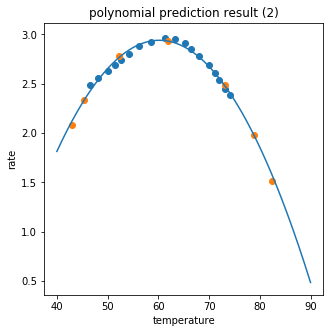

In [14]:
fig3 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_2_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (2)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()

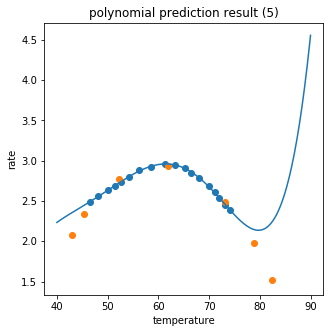

In [15]:
fig4 = plt.figure(figsize=(5,5))
plt.plot(X_range,y_5_range_predict)
plt.scatter(X_train,y_train)
plt.scatter(X_test,y_test)

plt.title('polynomial prediction result (5)')
plt.xlabel('temperature')
plt.ylabel('rate')
plt.show()